<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

Money velocity represents the willingness of spending and saving, M2 velocity includes CDs and money market fund, so it also shows about saving.

$M1$ is the money supply of currency in circulation (notes and coins, traveler's checks, demand deposits, and checkable deposits). A decreasing velocity of $M1$ might indicate fewer short-term consumption transactions are taking place.

$M2$ includes $M1$ in addition to saving deposits, certificates of deposit (less than $100,000), and money market mutural funds for individuals.

In [10]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1951, 1, 1)
end = dt.datetime.today()
V_M1 = pdr.data.DataReader('M1V', 'fred', start, end)
V_M2 = pdr.data.DataReader('M2V', 'fred', start, end)

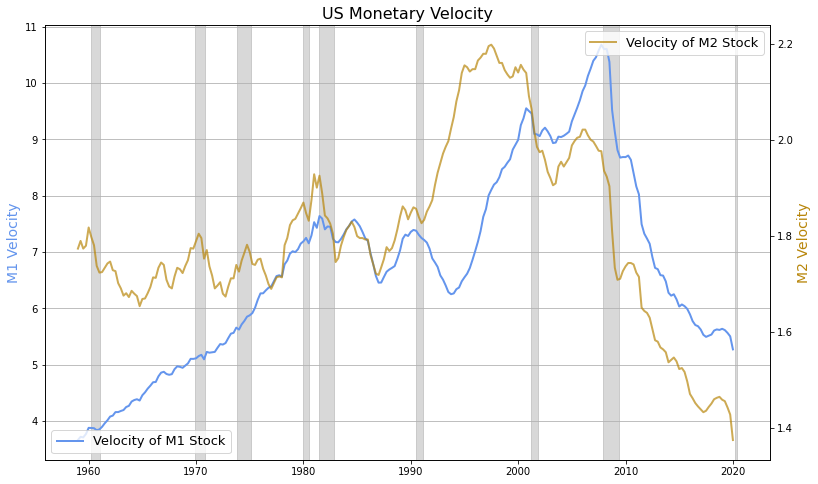

In [11]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(V_M1, color = 'CornflowerBlue', alpha = 1, label = 'Velocity of M1 Stock', lw = 2)
ax.set_ylabel('M1 Velocity', size = 14, color = 'CornflowerBlue')

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(V_M2, color = 'DarkGoldenRod', alpha = .7, label = 'Velocity of M2 Stock', lw = 2)
ax_RHS.set_ylabel('M2 Velocity', size = 14, color = 'DarkGoldenRod')

ax.legend(fontsize = 13, loc = 'lower left')
ax_RHS.legend(fontsize = 13, loc = 'upper right')
ax.yaxis.grid(True) # only horizontal grid
ax.set_title('US Monetary Velocity', size = 16)

alp = .3
ax.axvspan('1960-04-01','1961-02-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1969-12-01','1970-11-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1973-11-01','1975-03-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1980-01-01','1980-07-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1981-07-01','1982-11-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1990-07-01','1991-03-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2001-03-1','2001-11-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2007-12-1','2009-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
plt.savefig('US_Monetary Velocity.png',dpi = 220)
plt.show()

The YoY growth rate of $M2$ velocity is 

In [12]:
(V_M2.loc['2020-1-1']['M2V']-V_M2.loc['2019-1-1']['M2V'])/V_M2.loc['2020-1-1']['M2V']

-0.061135371179039354

The YoY growth rate of $M1$ velocity is 

In [13]:
(V_M1.loc['2020-1-1']['M1V']-V_M1.loc['2019-1-1']['M1V'])/V_M1.loc['2020-1-1']['M1V']

-0.06924682223487008

Personal saving rate rockets.

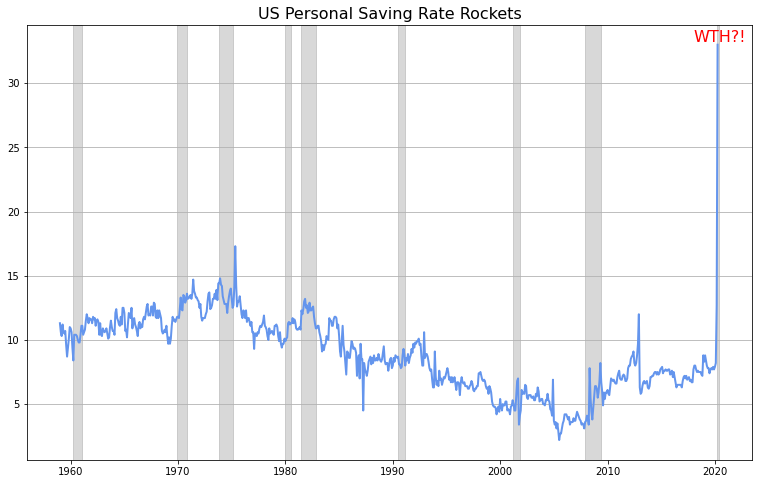

In [14]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1957, 1, 1)
end = dt.datetime.today()
saving = pdr.data.DataReader('PSAVERT', 'fred', start, end)

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(saving, color = 'CornflowerBlue', alpha = 1, label = 'Personal Saving Rate', lw = 2)
ax.set_title('US Personal Saving Rate Rockets', size = 16)
ax.yaxis.grid(True) 
ax.text('2018-1-1',saving.loc['2020-4-1']['PSAVERT']+.2, 'WTH?!', size = 16, color = 'r')

alp = .3
ax.axvspan('1960-04-01','1961-02-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1969-12-01','1970-11-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1973-11-01','1975-03-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1980-01-01','1980-07-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1981-07-01','1982-11-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('1990-07-01','1991-03-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2001-03-1','2001-11-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2007-12-1','2009-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
plt.savefig('US_Personal_Saving_Rate.png',dpi = 220)
plt.show()

Now let's look at the consumer credit and business debt in US.

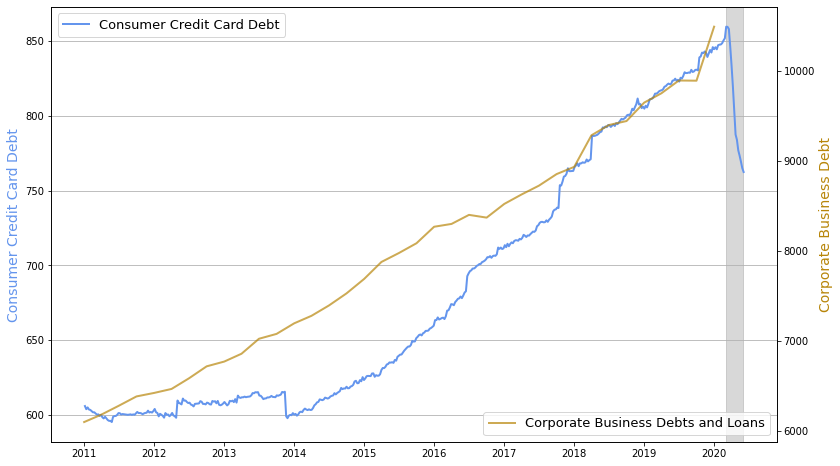

In [15]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(2011, 1, 1)
end = dt.datetime.today()
GDP_q = pdr.data.DataReader('GDP', 'fred', start, end)
#residMortgage = pdr.data.DataReader('HHMSDODNS', 'fred', start, end)
consrCreditCard = pdr.data.DataReader('CCLACBW027SBOG', 'fred', start, end)
busDebt =  pdr.data.DataReader('BCNSDODNS', 'fred', start, end)


fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(consrCreditCard, color = 'CornflowerBlue', alpha = 1, label = 'Consumer Credit Card Debt', lw = 2)
ax.set_ylabel('Consumer Credit Card Debt', size = 14, color = 'CornflowerBlue')

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(busDebt, color = 'DarkGoldenRod', alpha = .7, label = 'Corporate Business Debts and Loans', lw = 2)
ax_RHS.set_ylabel('Corporate Business Debt', size = 14, color = 'DarkGoldenRod')

ax.legend(fontsize = 13, loc = 'upper left')
ax_RHS.legend(fontsize = 13, loc = 'lower right')
ax.yaxis.grid(True) # only horizontal grid
#ax.set_title('US Monetary Velocity', size = 16)
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
plt.savefig('Corporate and Consumer debts.png',dpi = 220)
plt.show()

In the crisis, there is process of tranferring leverage from household to firms.

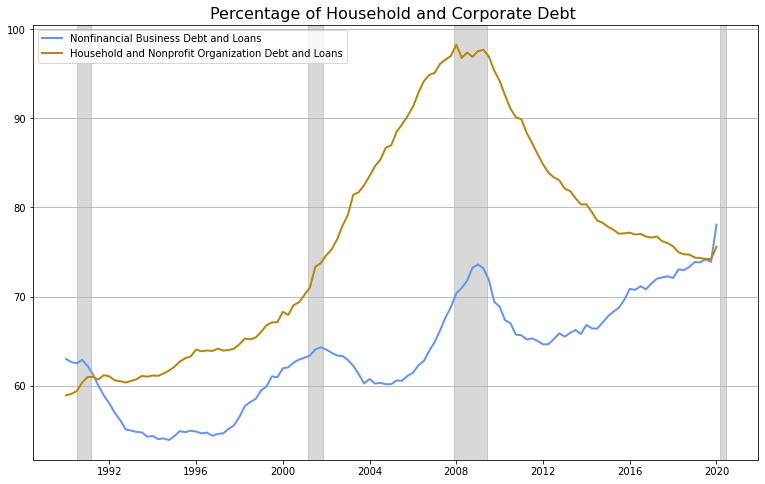

In [16]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1990, 1, 1)
end = dt.datetime.today()
nonFinBus = pdr.data.DataReader('TBSDODNS', 'fred', start, end) 
hhNPOrg = pdr.data.DataReader('CMDEBT', 'fred', start, end) 
GDP_q = pdr.data.DataReader('GDP', 'fred', start, end)
nonFinBus_GDP = nonFinBus['TBSDODNS']/GDP_q['GDP']*100
hhNPOrg_GDP = hhNPOrg['CMDEBT']/GDP_q['GDP']*100

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(nonFinBus_GDP, color = 'CornflowerBlue', alpha = 1, 
        label = 'Nonfinancial Business Debt and Loans', lw = 2)
ax.plot(hhNPOrg_GDP, color = 'DarkGoldenRod', alpha = 1, 
        label = 'Household and Nonprofit Organization Debt and Loans', lw = 2)

ax.set_title('Percentage of Household and Corporate Debt ', size = 16)
ax.yaxis.grid(True) 
ax.legend()

alp = .3
ax.axvspan('1990-07-01','1991-03-01',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2001-03-1','2001-11-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2007-12-1','2009-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
plt.savefig('Debt Percentage.png',dpi = 220)
plt.show()

Due to the leverage transferring, the AD is significantly suppressed than AS. That's why we see deflation.

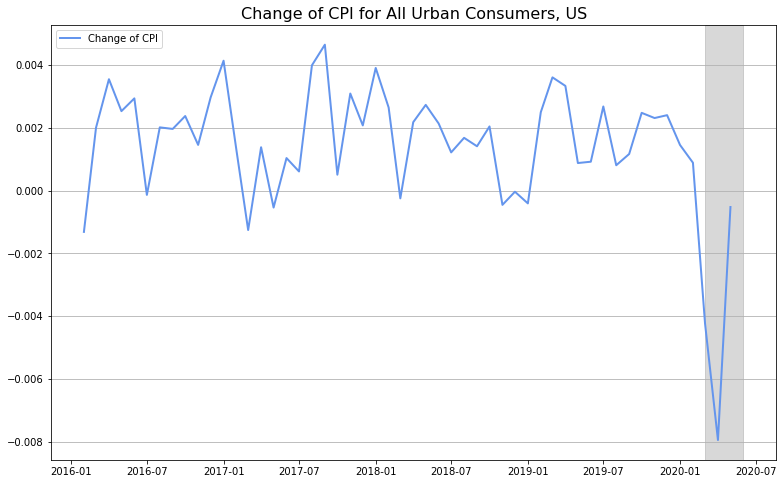

In [17]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(2016, 1, 1)
end = dt.datetime.today()
CPI = pdr.data.DataReader('CPIAUCSL', 'fred', start, end) 

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(CPI.pct_change() , color = 'CornflowerBlue', alpha = 1, 
        label = 'Change of CPI', lw = 2)

ax.yaxis.grid(True) 
ax.legend()

alp = .3
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.set_title('Change of CPI for All Urban Consumers, US', size = 16)
plt.savefig('CPI.png',dpi = 220)
plt.show()

Take a look at consumer confidence, how long does it recover after 2008 Great Recession?

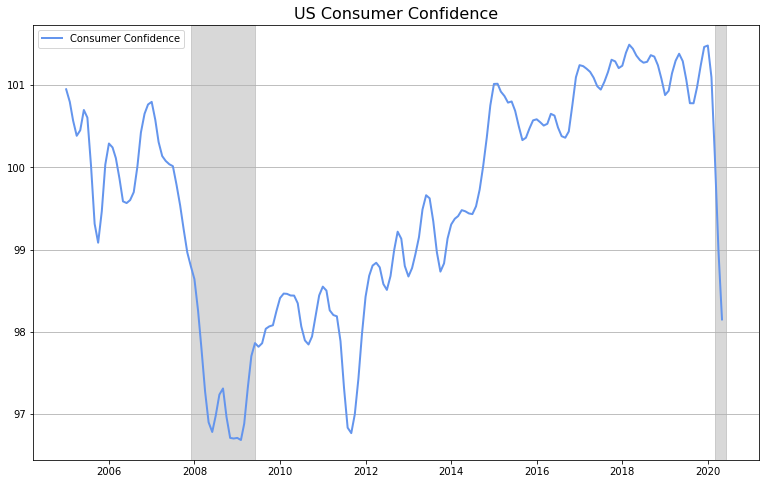

In [18]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(2005, 1, 1)
end = dt.datetime.today()
confidence = pdr.data.DataReader('CSCICP03USM665S', 'fred', start, end) 

fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(confidence , color = 'CornflowerBlue', alpha = 1, 
        label = 'Consumer Confidence', lw = 2)

ax.yaxis.grid(True) 
ax.legend()

alp = .3
ax.axvspan('2007-12-1','2009-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.axvspan('2020-3-1','2020-6-1',color = 'gray', alpha = alp, zorder = -1)
ax.set_title('US Consumer Confidence', size = 16)
plt.savefig('confidence.png',dpi = 220)
plt.show()

Velocity slowing down is not unique to US.

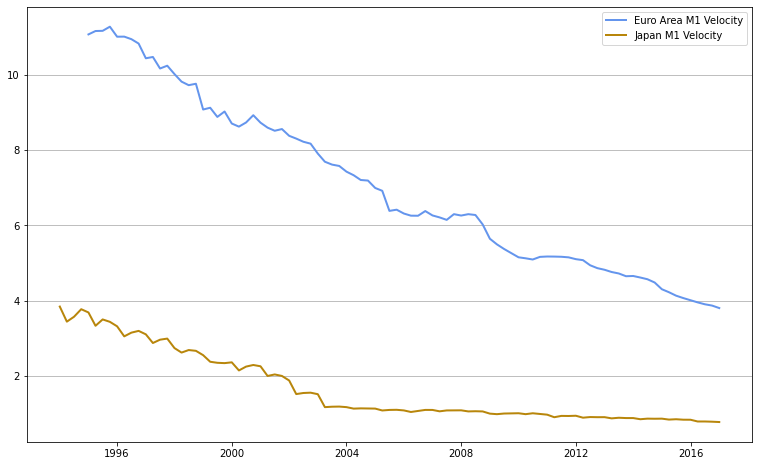

In [75]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1980, 1, 1)
end = dt.datetime.today()

M1_Euro = pdr.data.DataReader('MYAGM1EZM196N', 'fred', start, end)
GDP_Euro = pdr.data.DataReader('EUNNGDP', 'fred', start, end)
V_M1_Euro = GDP_Euro['EUNNGDP']/M1_Euro.iloc[::3, :]['MYAGM1EZM196N']*10e6

M1_JP = pdr.data.DataReader('MYAGM1JPM189N', 'fred', start, end)
GDP_JP = pdr.data.DataReader('JPNNGDP', 'fred', start, end)
V_M1_JP = GDP_JP['JPNNGDP']/M1_JP.iloc[::3, :]['MYAGM1JPM189N']*10e8


fig, ax = plt.subplots(figsize = (13, 8))

ax.plot(V_M1_Euro , color = 'CornflowerBlue', alpha = 1, 
        label = 'Euro Area M1 Velocity', lw = 2)
ax.plot(V_M1_JP , color = 'DarkGoldenRod', alpha = 1, 
        label = 'Japan M1 Velocity', lw = 2)
ax.yaxis.grid(True) 
ax.legend()
plt.savefig('JP and EU.png',dpi = 220)
plt.show()